## Statistics

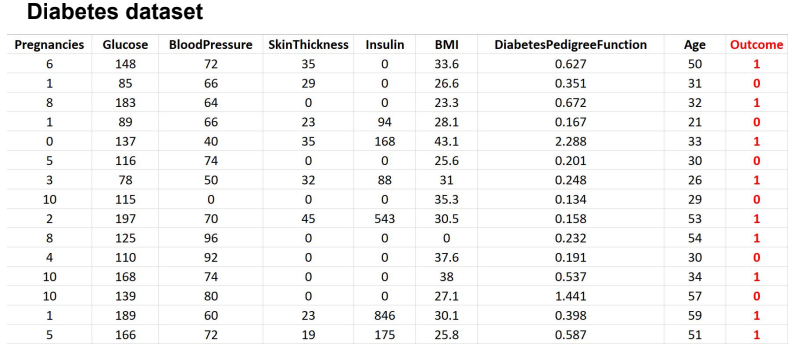

- Để hiểu dữ liệu , dataset thì thông thường , cách đơn giản nhất là chúng ta sẽ nhìn vào 1 vài dòng đầu tiên và nhìn qua các cột xem dữ liệu mặt mũi nó thế nào

- Ví dụ trên là dataset về bệnh tiểu đường của mẽo 

- Đánh giá qua xem nhiều dữ liệu hay ít dữ liệu , nhiều thuộc tính không chẳng hạn ( đánh giá sương sương) , giả như nhiều thì chia dataset theo kiểu 60-20-20 , ít thì 90-5-5 (ưu tiên bộ train chứ đúng không)

In [25]:
import pandas as pd

#Đọc dữ liệu từ file csv 
#(Comma Separated Value) nó cách nhau bởi dấu phẩy, khác với excel chút

data = pd.read_csv("diabetes.csv",delimiter=",")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#xem kiểu của dữ liệu
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#in ra 1 vài summary của dữ liệu
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


-    count: Số lượng quan sát hoặc dữ liệu không bị khuyết trong tập dữ liệu.
-    mean: Giá trị trung bình (mean) của tập dữ liệu. Đây là tổng của tất cả các giá trị chia cho số lượng giá trị.
-    std: Độ lệch chuẩn (standard deviation), một thước đo về mức độ phân tán của một tập hợp dữ liệu. Độ lệch chuẩn càng lớn thì dữ liệu càng phân tán rộng.
-    min: Giá trị nhỏ nhất trong tập dữ liệu.
-    25%: Phần trăm thứ 25, còn được gọi là phân vị thứ nhất hoặc Q1, là giá trị mà ở đó 25% dữ liệu thấp hơn hoặc bằng giá trị này.
-    50%: Phần trăm thứ 50, còn được gọi là trung vị, là giá trị ở giữa tập dữ liệu khi nó đã được sắp xếp. Nó chia tập dữ liệu thành hai nửa bằng nhau. Đối với số lượng dữ liệu chẵn, nó là trung bình của hai giá trị giữa.
-    75%: Phần trăm thứ 75, còn được gọi là phân vị thứ ba hoặc Q3, là giá trị mà ở đó 75% dữ liệu thấp hơn hoặc bằng giá trị này và 25% dữ liệu còn lại cao hơn.
-    max: Giá trị lớn nhất trong tập dữ liệu.

- xu hướng trung tâm (mean)
- sự phân tán (std, min, max) 
- phân bố dữ liệu (phân vị).

**Với bài toán classification , chúng ta cần xem dữ liệu phân bố label như thế nào**

In [9]:
count_class = data.groupby('Outcome').size()

In [10]:
count_class

Outcome
0    500
1    268
dtype: int64

**Nhận xét**
- 500 người ko làm sao
- 268 người bị tiểu đường

**Từ đây chúng ta có thể đánh giá bộ dữ liệu**
- bộ dữ liệu cân bằng (**balance dataset**) : khi có % class nó giống giống nhau
- Khi bộ dữ liệu nào có số lượng phần tử của class lớn nhất gấp 2-10 lần của class nhỏ nhất thì gọi là bộ dữ liệu mất cân bằng (**imbalance dataset**)
- trên 10 lần thì gọi là **highly imbalance dataset**

- class nào số lượng càng nhiều thì performance của model trên class đó càng tốt và ngược lại ( Nó giống như là đi thi gặp bài tủ ấy , model được học từ class nhiều hơn thì nó tốt ở class đó hơn )

**Dựa trên các tiêu chí này chúng ta sẽ chọn kỹ thuật tiền xử lý dữ liệu phù hợp**



## Handle missing or invalid values

**Tiếp theo chúng ta sẽ tìm cách giải quyết được những cái dữ liệu bị khuyết (missing) hoặc ko hợp lệ (invalid)**

### Missing value

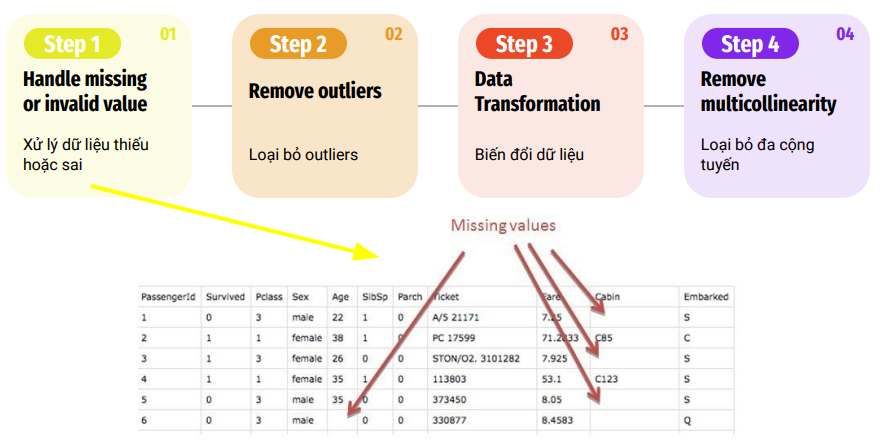


**Giải thích**
- Trong bảng dữ liệu có vài ô bị khuyết , không có gì 

**Cách xử lý**

- Nếu số lượng những cái hàng mà có tối thiểu 1 ô bị missing value < 5% thì chúng ta có thể bỏ hết các dòng đó đi (nếu có 1000 hàng mà có 10,20,30 hàng bị khuyết thì có thể bỏ , nhưng nếu là 100,200 hàng mà bỏ thì sẽ mất nhiều dữ liệu quá , lãng phí)

- Nếu không bỏ đi , thì điền vào thôi , cách điền dữ liệu :
    - **nếu dữ liệu dạng số** thì có thể dùng giá trị mean (giá trị kì vọng) hoặc median(trung vị)
    - **nếu dữ liệu dạng chữ, dạng categorical feature** (không thể điền mean hay median vì chữ thì khỏi tính) :
        - Có một phương pháp phổ biến là sử dụng giá trị yếu tố xuất hiện nhiều nhất trong cột dữ liệu đó, được gọi là **mode**.

            - **Mode**: Là giá trị xuất hiện thường xuyên nhất trong một tập hợp dữ liệu. Khi điền giá trị khuyết cho dữ liệu dạng phân loại, việc sử dụng mode là hợp lý vì nó đại diện cho giá trị phổ biến nhất và có thể coi là dự đoán tốt nhất cho giá trị khuyết dựa trên phân phối của dữ liệu có sẵn.

        - Hoặc chúng ta có thể tạo riêng 1 class cho những missing value đó như là unknown :v ( ví như số điện thoại , chúng ta không thể điền bừa vào được đúng ko nào , hoặc id cho con người thì không ô nào được trùng ô nào)

In [18]:
from sklearn.impute import SimpleImputer
import numpy as np

# Tạo một mảng numpy với giá trị khuyết
data = np.array([[1, np.nan, 3], [4, 3, np.nan], [8, 8, 2], [np.nan, 4, 5]])

# Tạo imputer với chiến lược là 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Áp dụng imputer vào dữ liệu
data_imputed = imputer.fit_transform(data)


In [19]:
data_imputed

array([[1.        , 5.        , 3.        ],
       [4.        , 3.        , 3.33333333],
       [8.        , 8.        , 2.        ],
       [4.33333333, 4.        , 5.        ]])

### Invaild value

**Giải thích** : 

- các chuỗi không mong đợi (ví dụ số điện thoại nhưng lại là chữ)
- các số không thể xảy ra (ví dụ âm cho tuổi) 
- các giá trị bên ngoài phạm vi cho phép.

**Cách xử lý**

- Tương tự với **Missing value**


## Remove Outlier

### Outlier

**Outlier** là 1 điểm dữ liệu khác biệt với dữ liệu còn lại (ví dụ đàn chim cánh cụt đen , lòi ra 1 con trắng -> outlier) , điểm **outlier** không phù hợp với model (làm mô hình học feature ko quan trọng , vv....)

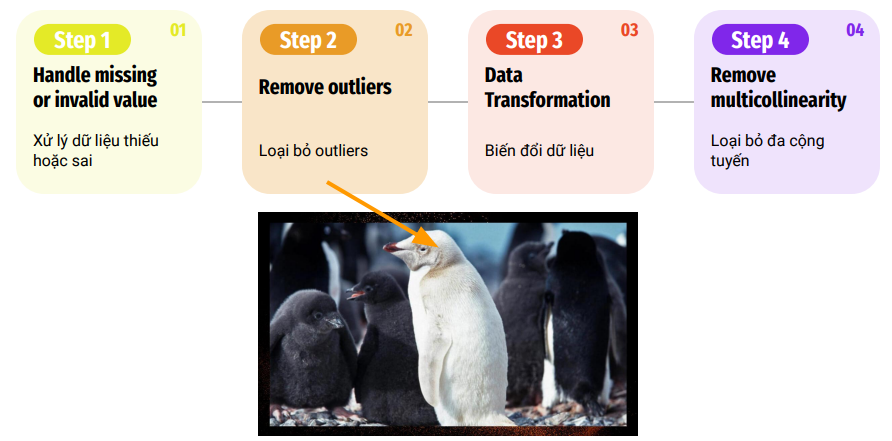

### Cách xử lý

- Loại bỏ: Nếu một outlier không thể giải thích được hoặc không phản ánh đúng quy trình sinh dữ liệu, có thể loại bỏ nó khỏi phân tích.
- Biến đổi dữ liệu: Áp dụng các phép biến đổi như log hoặc Box-Cox để giảm ảnh hưởng của outliers.
- Sử dụng các phương pháp thống kê mạnh mẽ: Sử dụng trung vị thay vì trung bình, hoặc sử dụng các phương pháp ước lượng mạnh mẽ khác có khả năng chịu đựng các điểm dữ liệu dị biệt.

**Thực tế** hậu quả của outlier không quá như trên lý thuyết đâu ;v chậc , lúc build model ngta đã gài cách để giúp giảm tác dụng của outlier gòi. Nhiều khi loại bỏ outlier xong model còn đi xuống









## Data tranformation


### Tiền xử lý dữ liệu **numerical features**

- **numerical features** là kiểu dữ liệu dạng số 

- Về cơ bản thì dạng số là dạng máy tính đã có thể hiều rồi (tất nhiên thì phải chuyển về dạng nhị phân , btw nó cũng dễ hiểu rồi)

- Tại sao phải xử lý dữ liệu dạng số : Vì dữ liệu dạng số về mặt bản chất có thể có những cái range , vùng khác nhau 
    - Ví dụ : Pregnancies thì chỉ là 0->17 , nhưng glucozer là 0->200
    
    -  Trong MachineLearning , dữ liệu nào range càng cao thì nó càng chú ý hơn

### 2 Cách cơ bản để tiền xử lý dữ liệu dạng số

**MinMaxScaler** : 
- Tìm ra giá trị min ,max  -> (lấy giá trị gốc - min) / max -> output (0,1)
- dễ bị ảnh hưởng bởi outlier (giả sử trong lớp có 10 ng , 9 người điểm từ 8-9 nhưng lòi ra 1 ông 3 điểm -> 3 sẽ là min -> ảnh hưởng kết quả dự đoán gòi)
 
**StandardScaler**
- dựa trên phân phối chuẩn :
    - mỗi cột tính ra mean (giá trị kì vọng) và std là độ lệch chuẩn
    - (lấy giá trị gốc - mean ) / std -> output (gần giống với Gauss)

**RobusScaler** 
- Tương tự **StandardScaler** nhưng mỗi lần tính mean và std thì không dùng toàn bộ dữ liệu mà tính từ Q1 (25%) -> Q2 (75%)

In [17]:
#MinmaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
before = data[["Pregnancies"]].values
after = scaler.fit_transform(data[["Pregnancies"]])

for b,a in zip(before, after):
    print("Before: {}, After: {}".format(b,a))
    
# (6-0) / 17 = 0.3529

Before: [6], After: [0.35294118]
Before: [1], After: [0.05882353]
Before: [8], After: [0.47058824]
Before: [1], After: [0.05882353]
Before: [0], After: [0.]
Before: [5], After: [0.29411765]
Before: [3], After: [0.17647059]
Before: [10], After: [0.58823529]
Before: [2], After: [0.11764706]
Before: [8], After: [0.47058824]
Before: [4], After: [0.23529412]
Before: [10], After: [0.58823529]
Before: [10], After: [0.58823529]
Before: [1], After: [0.05882353]
Before: [5], After: [0.29411765]
Before: [7], After: [0.41176471]
Before: [0], After: [0.]
Before: [7], After: [0.41176471]
Before: [1], After: [0.05882353]
Before: [1], After: [0.05882353]
Before: [3], After: [0.17647059]
Before: [8], After: [0.47058824]
Before: [7], After: [0.41176471]
Before: [9], After: [0.52941176]
Before: [11], After: [0.64705882]
Before: [10], After: [0.58823529]
Before: [7], After: [0.41176471]
Before: [1], After: [0.05882353]
Before: [13], After: [0.76470588]
Before: [5], After: [0.29411765]
Before: [5], After: 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
before = data[["Pregnancies"]].values
after_2 = scaler.fit_transform(data[["Pregnancies"]])

for b,a in zip(before, after_2):
    print("Before: {}, After: {}".format(b,a))

Before: [6], After: [0.63994726]
Before: [1], After: [-0.84488505]
Before: [8], After: [1.23388019]
Before: [1], After: [-0.84488505]
Before: [0], After: [-1.14185152]
Before: [5], After: [0.3429808]
Before: [3], After: [-0.25095213]
Before: [10], After: [1.82781311]
Before: [2], After: [-0.54791859]
Before: [8], After: [1.23388019]
Before: [4], After: [0.04601433]
Before: [10], After: [1.82781311]
Before: [10], After: [1.82781311]
Before: [1], After: [-0.84488505]
Before: [5], After: [0.3429808]
Before: [7], After: [0.93691372]
Before: [0], After: [-1.14185152]
Before: [7], After: [0.93691372]
Before: [1], After: [-0.84488505]
Before: [1], After: [-0.84488505]
Before: [3], After: [-0.25095213]
Before: [8], After: [1.23388019]
Before: [7], After: [0.93691372]
Before: [9], After: [1.53084665]
Before: [11], After: [2.12477957]
Before: [10], After: [1.82781311]
Before: [7], After: [0.93691372]
Before: [1], After: [-0.84488505]
Before: [13], After: [2.7187125]
Before: [5], After: [0.342980

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
before = data[["Pregnancies"]].values
after_3 = scaler.fit_transform(data[["Pregnancies"]])

for b,a in zip(before, after_3):
    print("Before: {}, After: {}".format(b,a))

Before: [6], After: [0.6]
Before: [1], After: [-0.4]
Before: [8], After: [1.]
Before: [1], After: [-0.4]
Before: [0], After: [-0.6]
Before: [5], After: [0.4]
Before: [3], After: [0.]
Before: [10], After: [1.4]
Before: [2], After: [-0.2]
Before: [8], After: [1.]
Before: [4], After: [0.2]
Before: [10], After: [1.4]
Before: [10], After: [1.4]
Before: [1], After: [-0.4]
Before: [5], After: [0.4]
Before: [7], After: [0.8]
Before: [0], After: [-0.6]
Before: [7], After: [0.8]
Before: [1], After: [-0.4]
Before: [1], After: [-0.4]
Before: [3], After: [0.]
Before: [8], After: [1.]
Before: [7], After: [0.8]
Before: [9], After: [1.2]
Before: [11], After: [1.6]
Before: [10], After: [1.4]
Before: [7], After: [0.8]
Before: [1], After: [-0.4]
Before: [13], After: [2.]
Before: [5], After: [0.4]
Before: [5], After: [0.4]
Before: [3], After: [0.]
Before: [3], After: [0.]
Before: [6], After: [0.6]
Before: [10], After: [1.4]
Before: [4], After: [0.2]
Before: [11], After: [1.6]
Before: [9], After: [1.2]
Bef

### Tiền xử lý dữ liệu **Categorical features**

**Ordinal**
- dữ liệu dạng Categorical nhưng có phân biệt dữ liệu
- Ví dụ : X , L , XL ,XXL 

In [28]:
from pandas import DataFrame
from sklearn.preprocessing import OrdinalEncoder

before = DataFrame(["XL","L","S","M","XS","XS","L","M"])
values = ["S","XS","M","L","XL"]
#values = [0,1,2,3,4]
scaler = OrdinalEncoder(categories=[values])
after = scaler.fit_transform(before)

for b,a in zip(before.values, after):
    print("Before: {}, After: {}".format(b,a))

Before: ['XL'], After: [4.]
Before: ['L'], After: [3.]
Before: ['S'], After: [0.]
Before: ['M'], After: [2.]
Before: ['XS'], After: [1.]
Before: ['XS'], After: [1.]
Before: ['L'], After: [3.]
Before: ['M'], After: [2.]


**Norminal** 

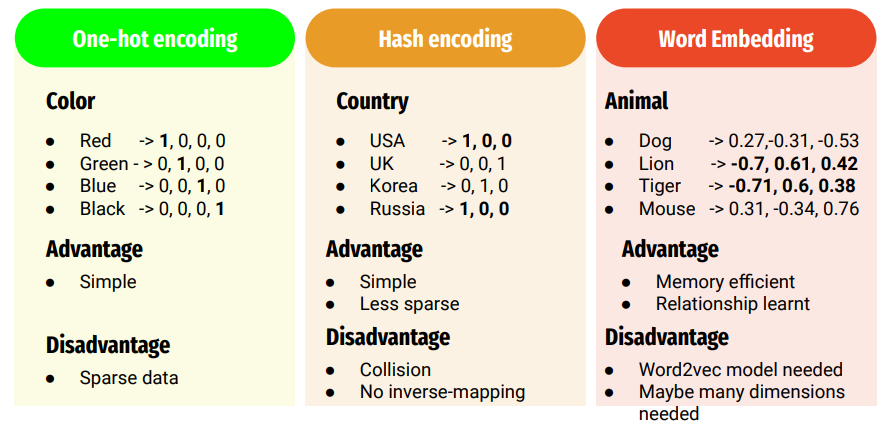